<a href="https://colab.research.google.com/github/OlgaHumphreys/goit-algo-hw-06/blob/main/goit_algo_hw_o6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завдання 1

Створіть граф за допомогою бібліотеки networkX для моделювання певної реальної мережі (наприклад, транспортної мережі міста, соціальної мережі, інтернет-топології).

INFO

📖 Реальну мережу можна вибрати на свій розсуд, якщо немає можливості придумати свою мережу, наближену до реальності.
Візуалізуйте створений граф, проведіть аналіз основних характеристик (наприклад, кількість вершин та ребер, ступінь вершин).

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Add vertices
intersections = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
G.add_nodes_from(intersections)

# add edges (roads)
roads = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'),
         ('C', 'E'), ('E', 'F'), ('E', 'G'), ('F', 'H'), ('G', 'H')]
G.add_edges_from(roads)

# Graph visualisation
pos = nx.spring_layout(G)  # Position of vertices
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=14, font_weight='bold')
plt.title("Transport Network of a City")
plt.show()

# Analysis of the main characteristics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
degree = dict(G.degree())

print(f"Number of nodes (vertices): {num_nodes}")
print(f"Number of edges: {num_edges}")
print("Degree of each node:")
for node, deg in degree.items():
    print(f"Node {node}: {deg}")


Завдання 2

Напишіть програму, яка використовує алгоритми DFS і BFS для знаходження шляхів у графі, який було розроблено у першому завданні.

Далі порівняйте результати виконання обох алгоритмів для цього графа, висвітлить різницю в отриманих шляхах. Поясніть, чому шляхи для алгоритмів саме такі.



In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

intersections = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
G.add_nodes_from(intersections)


roads = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'),
         ('C', 'E'), ('E', 'F'), ('E', 'G'), ('F', 'H'), ('G', 'H')]
G.add_edges_from(roads)


Алгоритм DFS

In [ ]:
def dfs(graph, start, goal, path=None):
    if path is None:
        path = []
    path = path + [start]

    if start == goal:
        return path

    for node in graph[start]:
        if node not in path:
            new_path = dfs(graph, node, goal, path)
            if new_path:
                return new_path
    return None


Алгоритм BFS

In [ ]:
from collections import deque

def bfs(graph, start, goal):
    queue = deque([[start]])
    visited = set()

    while queue:
        path = queue.popleft()
        node = path[-1]

        if node in visited:
            continue

        for neighbour in graph[node]:
            new_path = list(path)
            new_path.append(neighbour)
            queue.append(new_path)

            if neighbour == goal:
                return new_path

        visited.add(node)

    return None


Використання алгоритмів для знаходження шляхів

In [ ]:
# Graph conversion
graph = nx.to_dict_of_lists(G)

# Path finding
dfs_path = dfs(graph, 'A', 'H')
print(f"DFS path from 'A' to 'H': {dfs_path}")

# Path finding
bfs_path = bfs(graph, 'A', 'H')
print(f"BFS path from 'A' to 'H': {bfs_path}")


Comparison of results:
DFS path: can be longer and less intuitive because DFS goes as deep
as each branch before moving on the next node.
BFS path: the shortest path that will often be more intuitive,
as BFS explores all possibilities at one level before moving to the next.

Conclusion: The difference in the paths is explained by the principle of operation of the algorithms. DFS drills down to its maximum depth before moving to another branch, while BFS explores the nodes level by level, guaranteeing to find the shortest path in the graph.

Завдання 3

Реалізуйте алгоритм Дейкстри для знаходження найкоротшого шляху в розробленому графі: додайте у граф ваги до ребер та знайдіть найкоротший шлях між всіма вершинами графа.



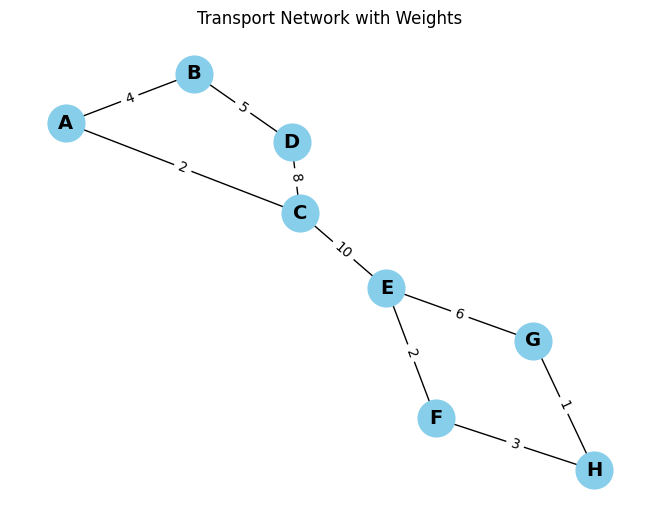

Shortest paths from A:
  To A: ['A']
  To B: ['A', 'B']
  To C: ['A', 'C']
  To D: ['A', 'B', 'D']
  To E: ['A', 'C', 'E']
  To F: ['A', 'C', 'E', 'F']
  To G: ['A', 'C', 'E', 'G']
  To H: ['A', 'C', 'E', 'F', 'H']
Shortest paths from B:
  To B: ['B']
  To A: ['B', 'A']
  To D: ['B', 'D']
  To C: ['B', 'A', 'C']
  To E: ['B', 'A', 'C', 'E']
  To F: ['B', 'A', 'C', 'E', 'F']
  To G: ['B', 'A', 'C', 'E', 'G']
  To H: ['B', 'A', 'C', 'E', 'F', 'H']
Shortest paths from C:
  To C: ['C']
  To A: ['C', 'A']
  To D: ['C', 'D']
  To E: ['C', 'E']
  To B: ['C', 'A', 'B']
  To F: ['C', 'E', 'F']
  To G: ['C', 'E', 'G']
  To H: ['C', 'E', 'F', 'H']
Shortest paths from D:
  To D: ['D']
  To B: ['D', 'B']
  To C: ['D', 'C']
  To A: ['D', 'B', 'A']
  To E: ['D', 'C', 'E']
  To F: ['D', 'C', 'E', 'F']
  To G: ['D', 'C', 'E', 'G']
  To H: ['D', 'C', 'E', 'F', 'H']
Shortest paths from E:
  To E: ['E']
  To C: ['E', 'C']
  To F: ['E', 'F']
  To G: ['E', 'G']
  To H: ['E', 'F', 'H']
  To A: ['E', 'C', 'A'

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

intersections = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
G.add_nodes_from(intersections)

roads = [
    ('A', 'B', 4), ('A', 'C', 2), ('B', 'D', 5), ('C', 'D', 8),
    ('C', 'E', 10), ('E', 'F', 2), ('E', 'G', 6), ('F', 'H', 3), ('G', 'H', 1)
]
G.add_weighted_edges_from(roads)

#Graph's visualisation
pos = nx.spring_layout(G)  # Vertices
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=14, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Transport Network with Weights")
plt.show()

def dijkstra_all_pairs_shortest_paths(graph):
    shortest_paths = {}
    for node in graph.nodes:
        shortest_paths[node] = nx.single_source_dijkstra_path(graph, node)
    return shortest_paths

# Find the shortest path
shortest_paths = dijkstra_all_pairs_shortest_paths(G)

# Results
for source, paths in shortest_paths.items():
    print(f"Shortest paths from {source}:")
    for target, path in paths.items():
        print(f"  To {target}: {path}")
